# K-means clustering
In this  lab, you will implement the k-means algorithm and use it
for image compression. You will first start on an example 2D dataset that
will help you gain intuition about how the k-means algorithm works. After
that, you will use the k-means algorithm implemented in sklearn for image compression by reducing
the number of colors that occur in an image to only those that are most
common in that image. You will also visualize the clusters in color space and learn about two metrics for evaluating the quality of clusters.

I have provided most of the required code for this lab. You will  write three functions, **for a total of five lines of code**.
- finding closest centroid to each point (given location of centroids)
- re-computing centroids (given cluster assignments)
- random initializing of cluster centroids

In [80]:
import scipy
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import imageio
import sklearn

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## The k-means algorithm
The k-means algorithm is a method to automatically cluster similar 
examples together. That is, given a training set $\{x^{(1)},\ldots, x^{(m)}\}$
(where $x^{(i)} \in \Re^d$), k-means groups the data into a few cohesive clusters.
The intuition behind k-means is an iterative procedure that starts by guessing
the initial cluster centroids, and then refines this guess by repeatedly assigning
examples to their closest centroids and then recomputing the centroids based
on the assignments.
The k-means algorithm is as follows:

```python
# Initialize centroids
centroids = kmeans_init_centroids(X, K)
for iter in range(iterations):
   # Cluster assignment step: Assign each data point to the closest centroid. 
   idx = find_closest_centroids(X, centroids)
   # Move centroid step: Compute means based on centroid assignments
   centroids = compute_centroids(X, idx, K)
```
The inner-loop of the algorithm repeatedly carries out two steps: (i) Assigning each training example $x^{(i)}$ to its closest centroid, and (ii) Recomputing each centroid using the points assigned to it. The k-means algorithm will always converge to some final set of centroids. Note that the converged solution may not always be ideal and will depend on the initial setting of the centroids. Therefore, in practice the k-means algorithm is usually run a few times with different random initializations. One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function (distortion). You will implement the two phases of the k-means algorithm as well as the random initialization of centroids.

## Problem 1: Finding closest centroids (5 points)
In the cluster assignment phase of the k-means algorithm, the algorithm
assigns every training example $x^{(i)}$ to its closest centroid, given the current
positions of centroids. Specifically, for every example $i$ we set
$c^{(i)} = argmin_j {||x^{(i)}-\mu_j||}^2$
where $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$, and  $\mu_j$ is the
position (value) of the $j^{th}$ centroid. 

Your task is to complete the function **find_closest_centroids**. This
function takes the data matrix **X** and the locations of all centroids inside
**centroids** and outputs a one-dimensional array **idx** that holds the
index (a value in {0, ...,K-1}, where K is total number of centroids) of the
closest centroid to every training example.

In [81]:
def find_closest_centroids(X, centroids):
    """
    find_closest_centroids computes the centroid memberships for every example
    idx = find_closest_centroids(X, centroids) returns the closest centroids
    in idx for a dataset X where each row is a single example. idx = m x 1 
    vector of centroid assignments (i.e. each entry in range [0..K-1])
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variable correctly.
    idx = np.zeros((X.shape[0],),dtype=int)
    
  
    for example in range(X.shape[0]):
        idx[example] = np.argmin(np.sum((X[example] - centroids)**2, axis = 1))

    return idx


## Test the find_closest_centroids function

In [82]:
#  Load an example dataset that we will be using
data = scipy.io.loadmat('kmeansdata2.mat')
X = data['X']

print('Finding closest centroids.')

# Select an initial set of centroids
K = 3; 
initial_centroids = np.array([[3,3],[6,2], [8,5]])

# Find the closest centroids for the examples using the
# initial_centroids

idx = find_closest_centroids(X, initial_centroids);
print('Closest centroids for the first 3 examples: (should be [0 2 1]): %s' %idx[0:3])

Finding closest centroids.
Closest centroids for the first 3 examples: (should be [0 2 1]): [0 2 1]


## Problem 2: Computing centroid means (5 points)
Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that were
assigned to it. Specifically, for every centroid $j$ we set
$ \mu_j = \frac{1}{|C_j|} \sum_{i\in C_j} x^{(i)} $ 
where 
$C_j$ is the set of examples that are assigned to centroid $j$.

You should now complete the function **compute\_centroids**. You can
implement this function using a loop over the centroids. You can also use a
loop over the examples; but if you can use a vectorized implementation that
does not use such a loop, your code should run faster.
Once you have completed the function, the next cell 
will run your function and output the centroids after the first step of k-means.

In [83]:
def compute_centroids(X, idx, K):
    """
    compute_centroids returs the new centroids by computing the means of the 
    data points assigned to each centroid.
    centroids = compute_centroids(X, idx, K) returns the new centroids by 
    computing the means of the data points assigned to each centroid. It is
    given a dataset X where each row is a single data point, a vector
    idx of centroid assignments (i.e. each entry in range [0..K-1]) for each
    example, and K, the number of centroids. You should return a matrix
    centroids, where each row of centroids is the mean of the data points
    assigned to it.
    """

    centroids = np.zeros((K, X.shape[1]))

    for centroid in range(K):
        centroids[centroid, :] = np.sum(X[np.where(idx == centroid)[0]], axis = 0)/np.where(idx == centroid)[0].shape[0]
   

    return centroids


## Test compute_centroids function

In [84]:
print ('Computing centroids means.')

#  Compute means based on the closest centroids found in the previous part.
centroids = compute_centroids(X, idx, K)

print ('Centroids computed after initial finding of closest centroids:')
print (centroids)

print ('(the centroids should be')
print ('   [ 2.428301 3.157924 ],  [ 5.813503 2.633656 ], [ 7.119387 3.616684 ]')

Computing centroids means.
Centroids computed after initial finding of closest centroids:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
(the centroids should be
   [ 2.428301 3.157924 ],  [ 5.813503 2.633656 ], [ 7.119387 3.616684 ]


## Problem 3: Random initialization of centroids (5 points)

In practice, a
good strategy for initializing the centroids is to select random examples from
the training set.
In this part of the exercise, you should complete the function **kmeans_init_centroids**.
First, randomly permute the indices of the examples. Then, select the first K examples based on the random
permutation of the indices. This allows the examples to be selected at random
without the risk of selecting the same example twice.

In [85]:
def kmeans_init_centroids(X,K):
    """
    This function initializes K centroids that are to be used on the dataset X.
    returns K initial centroids in X
    """
    centroids = np.zeros((K,X.shape[1]))
    
    #######################= YOUR CODE HERE ######################################
    #  Construct a random permutation of the examples and pick the first K items  #
    #  1 line of code expected.
    ###############################################################################
    centroids = X[np.random.permutation(range(X.shape[0]))][:K]
    
    
    ################################################################################
    #             END OF YOUR CODE                                                 #
    ################################################################################
    return centroids

## The k-means algorithm

The next cell will run the k-means algorithm
on a toy 2D dataset to help you understand how k-means works. Your
functions are called from inside the **run_kmeans** function. We encourage you
to take a look at the function to understand how it works. Notice that the
function calls the two functions you implemented in a loop.
When you run the next step, the function will produce a visualization
that steps you through the progress of the algorithm at each iteration.

In [86]:
def run_kmeans(X, initial_centroids, max_iters, plot_progress=False):
    """
    run_kmeans runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    [centroids, idx] = run_kmeans(X, initial_centroids, max_iters, ...
    plot_progress) runs the K-Means algorithm on data matrix X, where each 
    row of X is a single example. It uses initial_centroids used as the
    initial centroids. max_iters specifies the total number of interactions 
    of K-Means to execute. plot_progress is a true/false flag that 
    indicates if the function should also plot its progress as the 
    learning happens. This is set to false by default. run_kmeans returns 
    centroids, a Kxd matrix of the computed centroids and idx, a m x 1 
    vector of centroid assignments (i.e. each entry in range [0..K-1])
    """
   
    # Plot the data if we are plotting progress
    if plot_progress:
        plt.figure()

    # Initialize values
    m, d  = X.shape;
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m, 1))

    # Run K-Means
    for i in range(max_iters):
    
        # Output progress
        print ('K-Means iteration %d %d' %(i, max_iters))
    
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids);
    
        # Optionally, plot progress here
        if plot_progress:
            colors = cm.rainbow(np.linspace(0,1,K))
            plot_progress_kmeans(X, idx,range(K),colors,'','',centroids, previous_centroids, idx, K, i);
            previous_centroids = centroids;

    
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K);

    return centroids, idx


def plot_progress_kmeans(X,y,labels,colors,xlabel,ylabel,centroids,previous_centroids,idx,K,iter):
    
    plt.title('Iteration '+ str(iter))
    for i in range(len(labels)):
        Xl = X[np.where(y==labels[i])]
        plt.scatter(Xl[:,0],Xl[:,1],c=colors[i], s=40)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # plot the centroids
    for i in range(len(centroids)):
        plt.plot([previous_centroids[i,0], centroids[i,0]], [previous_centroids[i,1], centroids[i,1]], color='k', linestyle='-', linewidth=2)
        plt.plot(previous_centroids[i,0],previous_centroids[i,1],color = 'black',marker='x', markersize=3,mew=5)
    
# X is two dimensional data (x1, x2)
# y is a vector of labels from 0 to K-1
# colors are a list of K colors, and legend is a list of K legends

def plot_cluster_data(X,labels,y,colors,xlabel,ylabel,legend):
    fig = plt.figure()
    for i in range(len(labels)):
        Xl = X[np.where(y==labels[i])]
        plt.scatter(Xl[:,0],Xl[:,1],c=colors[i], s=40, label = legend[i])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="upper right")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Running k-means clustering on example dataset.
K-Means iteration 0 10


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


K-Means iteration 1 10


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

K-Means iteration 2 10
K-Means iteration 3 10
K-Means iteration 4 10
K-Means iteration 5 10


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

K-Means iteration 6 10
K-Means iteration 7 10

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.



K-Means iteration 8 10

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o


K-Means iteration 9 10
k-means Done.


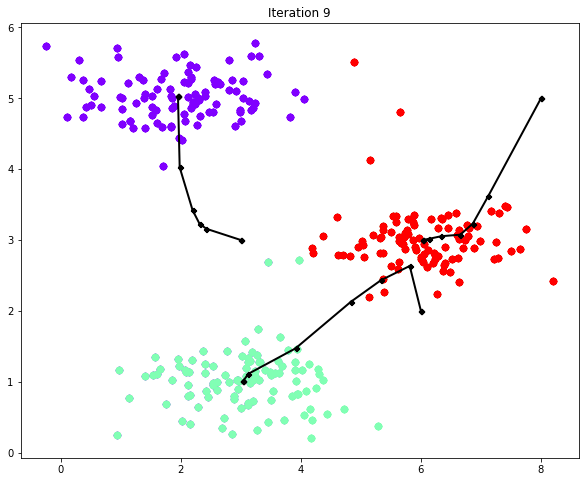

In [87]:
## =================== Part 3: K-Means Clustering ======================
## we start with known centroids here

print('Running k-means clustering on example dataset.')

# Settings for running k-means
K = 3;
max_iters = 10;

#  For consistency, here we set centroids to specific values
#  but in practice you want to generate them automatically, such as by
#  settings them to be random examples (as can be seen in
#  kmeans_init_centroids).

initial_centroids = np.array([[3,3],[6,2], [8,5]])

# Run the k-means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
[centroids, idx] = run_kmeans(X, initial_centroids, max_iters, plot_progress = True)
print('k-means Done.')

## Image compression with k-means

In this exercise, you will apply k-means to image compression. In a
straightforward 24-bit color representation of an image,  each pixel is represented
as three 8-bit unsigned integers (ranging from 0 to 255) that specify
the red, green and blue intensity values. This encoding is often refered to as
the RGB encoding. Our image contains thousands of colors, and in this part
of the exercise, you will reduce the number of colors to 16 colors.

By making this reduction, it is possible to represent (compress) the photo
in an efficient way. Specifically, you only need to store the RGB values of
the 16 selected colors, and for each pixel in the image you now need to only
store the index of the color at that location (where only 4 bits are necessary
to represent 16 possibilities).
In this exercise, you will use the k-means algorithm to select the 16 colors
that will be used to represent the compressed image. In particular, you will
treat every pixel in the original image as a data example and use the K-means
algorithm to find the 16 colors that best group (cluster) the pixels in the 3-
dimensional RGB space. Once you have computed the cluster centroids on
the image, you will then use the 16 colors to replace the pixels in the original
image.

The cell below first loads the image, and then reshapes it to create
an $m \times 3$ matrix of pixel colors (where $m = 16384 = 128 \times 128$), and calls
your k-means function on it.
After finding the top K = 16 colors to represent the image, you can now
assign each pixel position to its closest centroid using the **find_closest_centroids**
function. This allows you to represent the original image using the centroid
assignments of each pixel. Notice that you have significantly reduced the
number of bits that are required to describe the image. The original image
required 24 bits for each one of the $128 \times 128$  pixel locations, resulting in total
size of $128 \times 128 \times 24 = 393,216$ bits. The new representation requires some
overhead storage in form of a dictionary of 16 colors, each of which require
24 bits, but the image itself then only requires 4 bits per pixel location. The
final number of bits used is therefore $16 \times 24 + 128 \times 128 \times 4 = 65,920$  bits,
which corresponds to compressing the original image by about a factor of 6.

In [88]:
# Load an image of a bird

bird = imageio.imread('bird_small.png')

# divide by 255 so all values are scaled 0-1
bird = bird/255.

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.

r,c,_ = bird.shape

X = bird.reshape((r*c,3))

# now run kmeans (try other values for K to understand variation in quality of compression with K)

K = 16
max_iters = 10

# When using K-Means, it is important the initialize the centroids
# randomly.
initial_centroids = kmeans_init_centroids(X, K)

# run kmeans
[centroids, idx] = run_kmeans(X, initial_centroids, max_iters, plot_progress = False)

# image compression
# Find the closest centroids for each example
idx = find_closest_centroids(X,centroids)

# construct the color compressed version of X
X_color_compressed = np.zeros(X.shape)
X_color_compressed = centroids[idx,:]

# reshape the color compressed version of X
X_ccompressed = X_color_compressed.reshape((r,c,3))

K-Means iteration 0 10
K-Means iteration 1 10
K-Means iteration 2 10
K-Means iteration 3 10
K-Means iteration 4 10
K-Means iteration 5 10
K-Means iteration 6 10
K-Means iteration 7 10
K-Means iteration 8 10
K-Means iteration 9 10


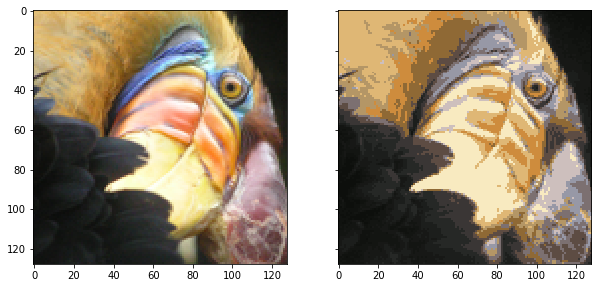

In [89]:
# show the pictures side by side
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(bird)
ax2.imshow(X_ccompressed)

## sklearn KMeans implementation
Complete documentation for this function is at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html.


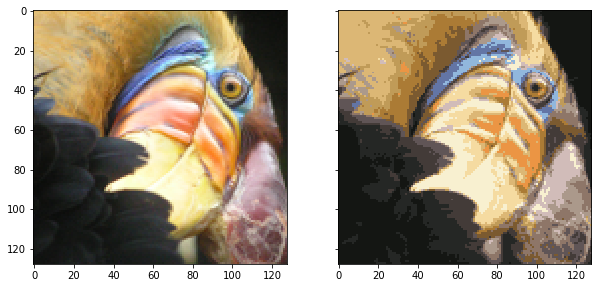

In [90]:
## run the sklearn version of the kmeans
from sklearn.cluster import KMeans

K = 16
kmeans = KMeans(init='k-means++', n_clusters=K, n_init=10).fit(X)
centers = kmeans.cluster_centers_
labels = kmeans.predict(X)

# construct the color compressed version of X
X_color_compressed = np.zeros(X.shape)
X_color_compressed = centers[labels,:]

# reshape the color compressed version of X
X_ccompressed = X_color_compressed.reshape((r,c,3))

# show the pictures side by side
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(bird)
ax2.imshow(X_ccompressed)

## Evaluating quality of clusters
Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or calculating the AUC  of a supervised classification algorithm, because ground truth labels are not known. 
Evaluation must be performed using the model itself. The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

- a: The mean distance between a sample and all other points in the same class.
- b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient s for a single sample is then given as:

$$ s = \frac{b-a}{max(a,b)} $$

Many other metrics for evaluating cluster quality are at https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation. Only two of the metrics do not need knowledge of class labels: Silhouette coefficient and the Calinski-Harabaz score.

In [92]:
from sklearn import metrics

for n in [2,4,8,16,32,64]:
    kmeans = KMeans(init='k-means++', n_clusters=n, n_init=10).fit(X)
    print('K = %d, silhouette coefficient = %.2f' %(n,metrics.silhouette_score(X, kmeans.predict(X))))

for n in [2,4,8,16,32,64]:
    kmeans = KMeans(init='k-means++', n_clusters=n, n_init=10).fit(X)    
    print('K = %d, Calinski-Harabaz score = %.2f' %(n,metrics.calinski_harabasz_score(X, kmeans.predict(X))))
    

K = 2, silhouette coefficient = 0.60
K = 4, silhouette coefficient = 0.50
K = 8, silhouette coefficient = 0.45
K = 16, silhouette coefficient = 0.40
K = 32, silhouette coefficient = 0.36
K = 64, silhouette coefficient = 0.32
K = 2, Calinski-Harabaz score = 41622.36
K = 4, Calinski-Harabaz score = 43525.82
K = 8, Calinski-Harabaz score = 38966.11
K = 16, Calinski-Harabaz score = 36286.64
K = 32, Calinski-Harabaz score = 32206.46
K = 64, Calinski-Harabaz score = 28122.37


## Visualizing clusters in color space

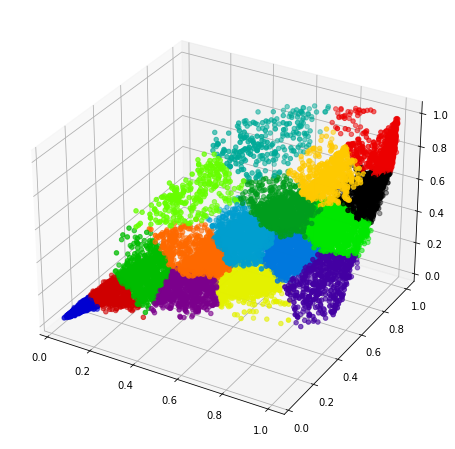

In [93]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

K = 16
kmeans = KMeans(init='k-means++', n_clusters=K, n_init=10,verbose=0).fit(X)
cluster_labels = kmeans.predict(X)
cluster_labels = kmeans.predict(X)
colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
ax.scatter(X[:, 0], X[:, 1], X[:,2],marker='o',  c=colors)